In [47]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

In [22]:
rv = norm(loc=1, scale=0)

In [106]:
y = []
_x = np.linspace(-5, 5, 100)
for x in _x:
    y.append(norm.logcdf(x, loc=0, scale=1))

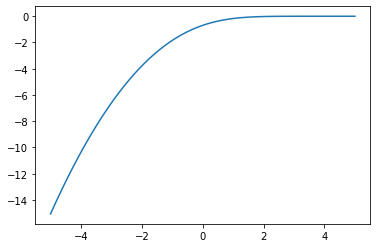

In [107]:
plt.plot(_x, y)

In [79]:
import math
x = np.array([1, 2])
sigma = np.identity(2)

a = np.array([12, 1])
b = np.array([2, 10])

d = a - b
print(x, d)

[1 2] [10 -9]


In [82]:
varAlongD = (d * sigma * d.T)[0]
print(np.sqrt(varAlongD))
meanAlongD = d.reshape(-1,).dot(x.reshape(-1,))
print(meanAlongD)
# norm.logcdf(meanAlongD, 0, np.sqrt(varAlongD))
np.log(norm.cdf(meanAlongD + 0.5, 0, np.sqrt(varAlongD)) - norm.cdf(meanAlongD - 0.5, 0, np.sqrt(varAlongD)))

[10.  0.]
-8


array([-3.54167366,         nan])

In [ ]:
norm.pdf()

In [112]:
norm(0, 1).rvs()

-0.894385450010955

# Log regression

In [9]:
import numpy as np
import src.bayes_logistic as bl

In [222]:
hidden_weights = np.array([0.8, 0.2])
utility = lambda x: hidden_weights[0] * x[0] + hidden_weights[1] * x[1] 

range_1 = [0, 200]
range_2 = [-13, -1]

In [375]:
from random import randint

X = []
Y = []

w_prior = np.ones(len(hidden_weights)) / len(hidden_weights)

for _ in range(20):
    p1 = np.array([randint(range_1[0], range_1[1]), randint(range_2[0], range_2[1])])
    p2 = np.array([randint(range_1[0], range_1[1]), randint(range_2[0], range_2[1])])
    x = p1 - p2
    X.append(x)
    Y.append(float(utility(p1) >= utility(p2)))
    
    # Regression
    H_prior_diag = np.ones(len(hidden_weights)) #* (1.0 / 0.5) ** 2

    w_fit, H_fit = bl.fit_bayes_logistic(np.array(Y),
                                         np.array(X),
                                         w_prior,
                                         H_prior_diag)
    unnorm_w = w_fit
    sum_w = sum(unnorm_w)
    print(unnorm_w / sum_w)
#     w_prior = unnorm_w / sum_w
    


[0.5 0.5]
[0.4462467 0.5537533]
[0.44996756 0.55003244]
[0.45325618 0.54674382]
[0.45442364 0.54557636]
[0.45803761 0.54196239]
[0.46110878 0.53889122]
[0.4588046 0.5411954]
[0.36436661 0.63563339]
[0.36500573 0.63499427]
[0.43278542 0.56721458]
[0.43026367 0.56973633]
[0.42909915 0.57090085]
[0.4344432 0.5655568]
[0.433521 0.566479]
[0.43444633 0.56555367]
[0.44206459 0.55793541]
[0.44079655 0.55920345]
[0.44155542 0.55844458]
[0.44349079 0.55650921]


In [151]:
w_prior = np.ones(len(hidden_weights)) / \
    len(hidden_weights)
H_prior_diag = np.ones(
    len(hidden_weights)) * (1.0 / 0.33) ** 2

print(w_prior)
w_fit, H_fit = bl.fit_bayes_logistic(Y,
                                     X,
                                     w_prior,
                                     H_prior_diag)
unnorm_w = w_fit
sum_w = sum(unnorm_w)
print(unnorm_w / sum_w)


[0.5 0.5]
[0.50054316 0.49945684]


In [5]:
import numpy as np
GAMMA_BST = 0.95


solutions = [
    [18 * GAMMA_BST**2, sum([-1 * GAMMA_BST**i for i in range(2)])],
    [26 * GAMMA_BST**3, sum([-1 * GAMMA_BST**i for i in range(3)])],
    [31 * GAMMA_BST**4, sum([-1 * GAMMA_BST**i for i in range(4)])],
    [44 * GAMMA_BST**7, sum([-1 * GAMMA_BST**i for i in range(7)])],
    [48.2 * GAMMA_BST**8, sum([-1 * GAMMA_BST**i for i in range(8)])],
    [56 * GAMMA_BST**10, sum([-1 * GAMMA_BST**i for i in range(10)])],
    [72 * GAMMA_BST**14, sum([-1 * GAMMA_BST**i for i in range(14)])],
    [76.3 * GAMMA_BST**15, sum([-1 * GAMMA_BST**i for i in range(15)])],
    [90 * GAMMA_BST**18, sum([-1 * GAMMA_BST**i for i in range(18)])],
    [100 * GAMMA_BST**20, sum([-1 * GAMMA_BST**i for i in range(20)])],
]

# weights = [0.43418691, 0.56581309]
weights = [0.36666223, 0.63333777]

def get_best_sol(weights):
    utility = lambda x: weights[0] * x[0] + weights[1] * x[1]

    best_u = -1000
    best_sol = 0

    for sol in solutions:
        if utility(sol) > best_u:
            best_u = utility(sol)
            best_sol = sol

    return best_sol

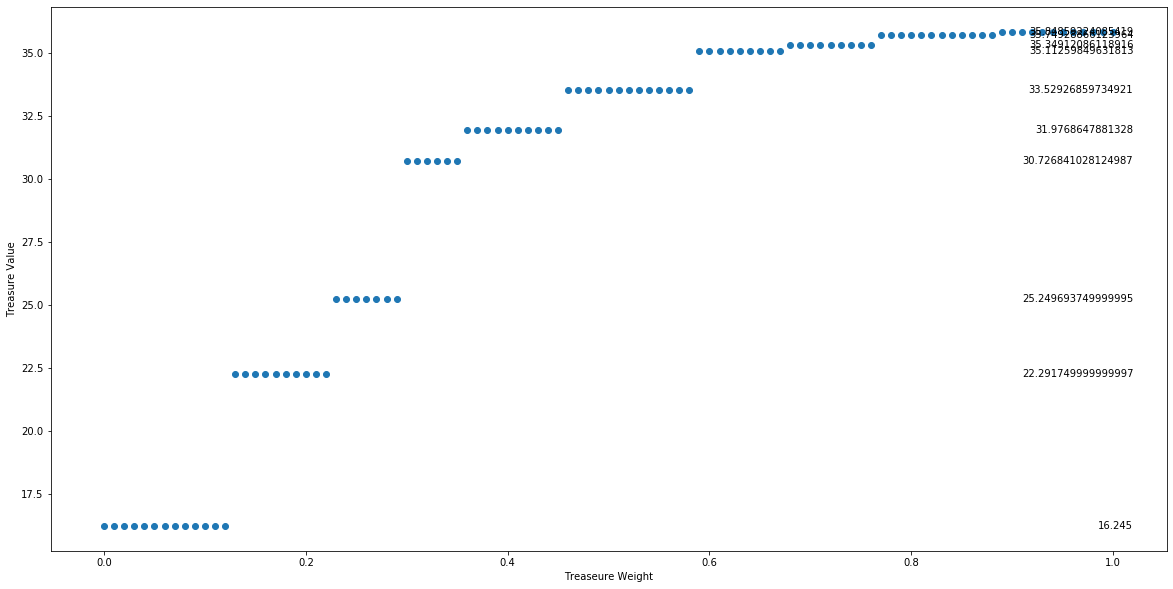

In [6]:
import matplotlib.pyplot as plt

y = []
u = []
weights_line = np.arange(0, 1.01, 0.01)

for w in weights_line:
    val = get_best_sol([w, 1-w])
    u.append(w * val[0] + (1-w) * val[1])
    y.append(val[0])
#     print(w, val)

plt.figure(figsize=(20, 10))
plt.scatter(x=weights_line, y=y)
plt.xlabel("Treaseure Weight")
plt.ylabel("Treasure Value")

for sol in solutions:
#     plt.hlines(sol[0], 0, 1, linestyles='dashed')
    plt.text(1.02, sol[0], sol[0], ha='right', va='center')

In [7]:
unique_y = set(y)
unique_y

{16.245,
 22.291749999999997,
 25.249693749999995,
 30.726841028124987,
 31.9768647881328,
 33.52926859734921,
 35.11259849631813,
 35.34912086118916,
 35.74928866123964,
 35.84859224085419}

In [8]:
len(unique_y)

10

In [9]:
print(u[-10:])
print(weights_line[-10:])

[31.467493599512693, 31.954282337439526, 32.44107107536636, 32.92785981329319, 33.41464855122002, 33.901437289146855, 34.388226027073685, 34.87501476500052, 35.36180350292736, 35.84859224085419]
[0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.  ]


In [33]:
hidden_weights = [1, 0.0]

utility = lambda x: hidden_weights[0] * x[0] + hidden_weights[1] * x[1]

max_u = utility(get_best_sol(hidden_weights))
print(max_u)

35.84859224085419


In [36]:
utilities = []
norm_utilities = []
for sol in solutions:
    utilities.append(utility(sol))
print(utilities)
print()
for u in utilities:
    norm_utilities.append((u - min(utilities)) / (max(utilities) - min(utilities)))

print(norm_utilities)

[16.245, 22.291749999999997, 25.249693749999995, 30.726841028124987, 31.9768647881328, 33.52926859734921, 35.11259849631813, 35.34912086118916, 35.74928866123964, 35.84859224085419]

[0.0, 0.308451120881737, 0.4593389639697807, 0.7387340468113087, 0.8024990825583156, 0.8816888448295984, 0.9624561796892389, 0.9745214359935458, 0.9949344192434487, 1.0]


In [364]:
w_list = np.arange(0, 1, 0.01)
u_list = []
for w in w_list:
    sol = get_best_sol([w, 1-w])
    u_list.append(utility(sol) / max_u)
    
    

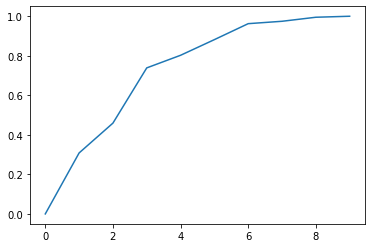

In [32]:
plt.plot(norm_utilities);


In [ ]:
17.1 * 1 +  0.

In [2]:
from collections import namedtuple

Point = namedtuple("Point", ["x", "y"])

def intersection(p1, p2, p3, p4):
    """
    Compute the intersection of the lines defined as
    (p1, p2) and (p3, p4)
    """
    # print(p1, p2, p3, p4)
    numX = (p1.x*p2.y-p1.y*p2.x)*(p3.x-p4.x)-(p1.x-p2.x)*(p3.x*p4.y-p3.y*p4.x)
    numY = (p1.x*p2.y-p1.y*p2.x)*(p3.y-p4.y)-(p1.y-p2.y)*(p3.x*p4.y-p3.y*p4.x)
    denum = (p1.x-p2.x)*(p3.y-p4.y)-(p1.y-p2.y)*(p3.x-p4.x)

    px = numX / denum
    py = numY / denum
    # return Point(round(px, 4), round(py, 4))
    return px, py

In [3]:
intersection(Point(0.1, 0), Point(0.1, 3), Point(0, 4), Point(1, 2))

(0.10000000000000002, 3.8000000000000003)

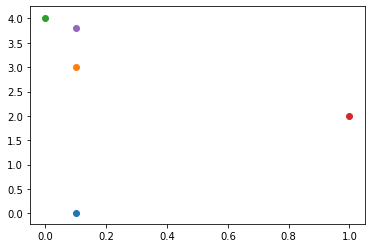

In [7]:
import matplotlib.pyplot as plt
plt.scatter(0.1, 0)
plt.scatter(0.1, 3)
plt.scatter(0, 4)
plt.scatter(1, 2)
plt.scatter(0.1, 3.8)

In [65]:
import numpy as np

def sample_point_on_sphere(npoints, ndim=3):
    vec = np.random.randn(ndim)
    vec /= np.linalg.norm(vec, axis=0)
    while not (not False in np.all(vec>0, axis=0)):
        vec = np.random.randn(ndim)
        vec /= np.linalg.norm(vec, axis=0)
    return vec

def sample_spherical(npoints, ndim=3):
    vec = np.random.randn(ndim, npoints)
    vec /= np.linalg.norm(vec, axis=0)
    while not (not False in np.all(vec>0, axis=0)):
        vec = np.random.randn(ndim, npoints)
        vec /= np.linalg.norm(vec, axis=0)
    return vec

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d

phi = np.linspace(0, np.pi, 20)
theta = np.linspace(0, 2 * np.pi, 40)
x = np.outer(np.sin(theta), np.cos(phi))
y = np.outer(np.sin(theta), np.sin(phi))
z = np.outer(np.cos(theta), np.ones_like(phi))

xi, yi, zi = sample_spherical(300)

fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d'})
# ax.plot_wireframe(x, y, z, color='k', rstride=1, cstride=1)
ax.scatter(xi, yi, zi, s=100, c='r', zorder=10)

# print(xi, yi, zi)

KeyboardInterrupt: 

In [61]:
import numpy as np
arr = np.array([[0.8, 0.9, 0.2], [0.1, 0.6, 0.1], [0.2, 0.3, 0.4]])
print(arr)
print(np.all(arr>0, axis=0))

[[0.8 0.9 0.2]
 [0.1 0.6 0.1]
 [0.2 0.3 0.4]]
[ True  True  True]


In [82]:
def sample_point_on_positive_sphere():
    ndim = 3
    vec = np.random.randn(ndim)
    vec /= np.linalg.norm(vec, axis=0)
    while not (vec>0).all():
        vec = np.random.randn(ndim)
        vec /= np.linalg.norm(vec, axis=0)
    return vec

In [118]:
def create_3D_pareto_front(plot=False):
    pareto_front = []
    xs = []
    ys = []
    zs = []

    for _ in range(20):
        x, y, z = sample_point_on_positive_sphere()
        pareto_front.append([x, y, z])
        xs.append(x)
        ys.append(y)
        zs.append(z)
    if plot:
        fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d'})
        ax.scatter(xs, ys, zs, s=100, c='r', zorder=10)
        fig.show()
    
    return pareto_front

/home/benjamin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


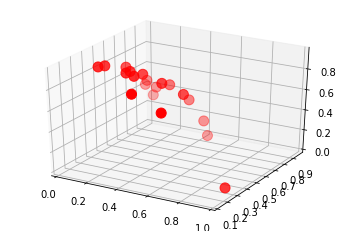

In [126]:
pf = create_3D_pareto_front(plot=True)

In [103]:
np.inf

inf

In [104]:
np.inf > 3

True

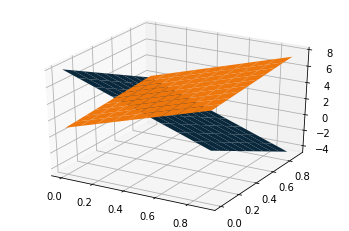

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

points1 = [[1, 0, 1],
           [0, 1, 1],
           [0, 0, 8]]

points2 = [[1, 0, 7],
           [0, 1, 2],
           [0, 0, 1]]

def get_plane_from_points(points):

    p0, p1, p2 = points
    x0, y0, z0 = p0
    x1, y1, z1 = p1
    x2, y2, z2 = p2

    ux, uy, uz = u = [x1-x0, y1-y0, z1-z0]
    vx, vy, vz = v = [x2-x0, y2-y0, z2-z0]

    u_cross_v = [uy*vz-uz*vy, uz*vx-ux*vz, ux*vy-uy*vx]

    point  = np.array(p0)
    normal = np.array(u_cross_v)

    d = -point.dot(normal)

    xx, yy = np.meshgrid(np.arange(0, 1, 0.1), np.arange(0, 1, 0.1))

    z = (-normal[0] * xx - normal[1] * yy - d) * 1. / normal[2]
    
    return xx, yy, z

xx, yy, z = get_plane_from_points(points1)
xx2, yy2, z2 = get_plane_from_points(points2)


# plot the surface
plt3d = plt.figure().gca(projection='3d')
plt3d.plot_surface(xx, yy, z)
plt3d.plot_surface(xx2, yy2, z2)

plt.show()

In [4]:
np.arange(0, 1, 10)

array([0])

In [20]:
from sympy import Point3D, Plane, Segment3D, Circle, Point
from sympy.plotting import plot, plot3d, plot3d_parametric_surface, PygletPlot, plot_implicit
import random

plane_1 = Plane(Point3D(1, 0, 1), Point3D(0, 1, 1), Point3D(0, 0, 8))
plane_2 = Plane(Point3D(1, 0, 7), Point3D(0, 1, 2), Point3D(0, 0, 1))

print(plane_1.equation())
print(plane_2.equation())

intersec = plane_1.intersection(plane_2)
seg = Segment3D(intersec[0].p1, intersec[0].p2)

7*x + 7*y + z - 8
-6*x - y + z - 1


In [28]:
print(intersec)

[Line3D(Point3D(-3/7, 11/7, 0), Point3D(53/7, -80/7, 35))]


In [18]:
p = PygletPlot()
c = Circle(Point(0,0), 1)
p[0] = intersec

In [49]:
from scipy.optimize import linprog

# Set up values relating to both minimum and maximum values of y
coefficients_inequalities = [[-1, -1]]  # require -1*x + -1*y <= -180
constants_inequalities = [-180]
coefficients_equalities = [[3, 12]]  # require 3*x + 12*y = 1000
constants_equalities = [1000]
bounds_x = (30, 160)  # require 30 <= x <= 160
bounds_y = (10, 60)  # require 10 <= y <= 60

# Find and print the minimal value of y
coefficients_min_y = [0, 1]  # minimize 0*x + 1*y
res = linprog(coefficients_min_y,
              A_ub=coefficients_inequalities,
              b_ub=constants_inequalities,
              A_eq=coefficients_equalities,
              b_eq=constants_equalities,
              bounds=(bounds_x, bounds_y))
print('Minimum value of y =', res.fun)

# Find and print the maximal value of y = minimal value of -y
coefficients_max_y = [0, -1]  # minimize 0*x + -1*y
res = linprog(coefficients_max_y,
              A_ub=coefficients_inequalities,
              b_ub=constants_inequalities,
              A_eq=coefficients_equalities,
              b_eq=constants_equalities,
              bounds=(bounds_x, bounds_y))
print('Maximum value of y =', -res.fun)  # opposite of value of -y

Minimum value of y = 43.33333333332679
Maximum value of y = 51.11111111104069


(array([ 0.29766804, -1.35871056, -0.57270233]), array([ -7.70233196,  11.64128944, -35.57270233]))


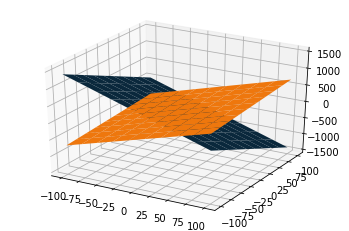

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

p1 = (7, 7, 1, 8)
p2 = (-6, -1, 1, 1)

def get_plan(p):
    a, b, c, d = p
    x = np.linspace(-100,100,10)
    y = np.linspace(-100,100,10)

    X,Y = np.meshgrid(x,y)
    Z = (d - a*X - b*Y) / c
    return X, Y, Z



def plane_intersect(a, b):
    """
    a, b   4-tuples/lists
           Ax + By +Cz + D = 0
           A,B,C,D in order  

    output: 2 points on line of intersection, np.arrays, shape (3,)
    """
    a_vec, b_vec = np.array(a[:3]), np.array(b[:3])

    aXb_vec = np.cross(a_vec, b_vec)

    A = np.array([a_vec, b_vec, aXb_vec])
    d = np.array([-a[3], -b[3], 0.]).reshape(3,1)

# could add np.linalg.det(A) == 0 test to prevent linalg.solve throwing error

    p_inter = np.linalg.solve(A, d).T

    return p_inter[0], (p_inter + aXb_vec)[0]


a, b = (-6,-1,1,1), (7,7,1,8)
intersec = plane_intersect(a, b)
print(intersec)

X, Y, Z = get_plan(p1)
X2, Y2, Z2 = get_plan(p2)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z)
ax.plot_surface(X2, Y2, Z2)
ax.scatter([intersec[0][0], intersec[1][0]], [intersec[0][1], intersec[1][1]], [intersec[0][2], intersec[1][2]])

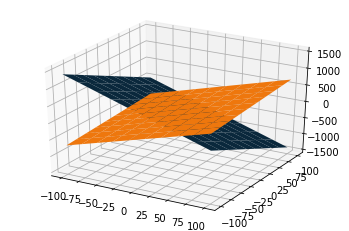

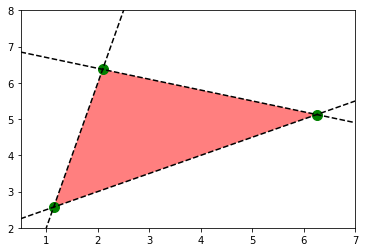

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import Symbol

def f1(x):
    return 4.0*x-2.0
def f2(x):
    return 0.5*x+2.0
def f3(x):
    return -0.3*x+7.0

x = Symbol('x')
x1, =  solve(f1(x)-f2(x))
x2, =  solve(f1(x)-f3(x))
x3, =  solve(f2(x)-f3(x))

y1 = f1(x1)
y2 = f1(x2)
y3 = f2(x3)

plt.plot(x1,f1(x1),'go',markersize=10)
plt.plot(x2,f1(x2),'go',markersize=10)
plt.plot(x3,f2(x3),'go',markersize=10)

plt.fill([x1,x2,x3,x1],[y1,y2,y3,y1],'red',alpha=0.5)

xr = np.linspace(0.5,7.5,100)
y1r = f1(xr)
y2r = f2(xr)
y3r = f3(xr)

plt.plot(xr,y1r,'k--')
plt.plot(xr,y2r,'k--')
plt.plot(xr,y3r,'k--')

plt.xlim(0.5,7)
plt.ylim(2,8)

plt.show()

In [58]:
import numpy as np
from collections import Counter

r1 = np.array([1, 2])
r2 = np.array([1, 2])
r3 = np.array([2, 4])
r4 = np.array([2, 4])
r5 = np.array([2, 4])



r = [r1, r2, r3, r4, r5]

list(Counter(tuple(d) for d in r).most_common(1)[0][0])

[2, 4]

In [59]:
a,b = r1

In [61]:
a

1

In [66]:
x = "0.4_0.2_0.4"
w = np.array([float(w) for w in x.split('_')])

In [67]:
d = {w: "a"}

TypeError: unhashable type: 'numpy.ndarray'